# ex.2 Feed forward network on sample dataset

In [1]:
#Libraries:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

C:\Users\daiku\OneDrive\Documents\Python Scripts\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Dataset:
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()
x_train,x_test, = x_train /255.0, x_test /255.0
x_train



array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [3]:
#Build MOdel 
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(128, activation='relu'),
    Dense(10,activation='softmax')
])

model.compile(optimizer=Adam(),
             loss=SparseCategoricalCrossentropy(),
             metrics=[SparseCategoricalAccuracy()])


C:\Users\daiku\OneDrive\Documents\Python Scripts\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
#model fit:
model.fit(x_train,y_train,epochs=5,batch_size = 32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.4350 - sparse_categorical_accuracy: 0.8777
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1220 - sparse_categorical_accuracy: 0.9654
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0801 - sparse_categorical_accuracy: 0.9762
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0565 - sparse_categorical_accuracy: 0.9827
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0412 - sparse_categorical_accuracy: 0.9876


In [5]:
model.save('FNN_INBUILD_DATA.keras')

In [6]:
test_loss,test_accuracy = model.evaluate(x_test,y_test)
print(f'\nTest accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 0.0808 - sparse_categorical_accuracy: 0.9743

Test accuracy: 0.9779000282287598


In [29]:
#custom dataset

In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
df = pd.read_csv(r"C:\Users\daiku\Downloads\xl sheets\customer_shopping_data.csv")
df.head(3)

invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity

In [32]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [34]:
x= df.drop(columns = ['customer_id', 'gender', 'age', 'category'])
y = df['customer_id']
x

invoice_no  quantity    price payment_method invoice_date  \
0        I138884         5  1500.40    Credit Card     5/8/2022   
1        I317333         3  1800.51     Debit Card   12/12/2021   
2        I127801         1   300.08           Cash    9/11/2021   
3        I173702         5  3000.85    Credit Card   16/05/2021   
4        I337046         4    60.60           Cash   24/10/2021   
...          ...       ...      ...            ...          ...   
99452    I219422         5    58.65    Credit Card   21/09/2022   
99453    I325143         2    10.46           Cash   22/09/2021   
99454    I824010         2    10.46     Debit Card   28/03/2021   
99455    I702964         4  4200.00           Cash   16/03/2021   
99456    I232867         3    35.19    Credit Card   15/10/2022   

          shopping_mall  
0                Kanyon  
1        Forum Istanbul  
2             Metrocity  
3          Metropol AVM  
4                Kanyon  
...                 ...  
99452            Kanyon  
99453    Forum Istanbul  
99454         Metrocity  
99455      Istinye Park  
99456  Mall of Istanbul  

[99457 rows x 6 columns]

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=0.2, random_state=23)
y_train

62541    C217508
6920     C643861
42730    C215107
3709     C152461
24532    C107482
          ...   
71711    C133092
9704     C631973
76726    C500246
92105    C414819
9256     C324134
Name: customer_id, Length: 79565, dtype: object

In [3]:
# code chatgpt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
# Flatten the 28x28 images into 1D vectors of size 784
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

# Normalize the pixel values (scale them between 0 and 1)
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoded vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the Feedforward Neural Network
model = models.Sequential()

# Input layer + first hidden layer with 128 neurons and ReLU activation
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))

# Second hidden layer with 64 neurons and ReLU activation
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 neurons (one for each digit) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


C:\Users\daiku\OneDrive\Documents\Python Scripts\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\daiku\OneDrive\Documents\Python Scripts\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8098 - loss: 0.6644 - val_accuracy: 0.9453 - val_loss: 0.1923
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9525 - loss: 0.1651 - val_accuracy: 0.9611 - val_loss: 0.1351
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9676 - loss: 0.1079 - val_accuracy: 0.9651 - val_loss: 0.1139
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9752 - loss: 0.0823 - val_accuracy: 0.9693 - val_loss: 0.1027
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9805 - loss: 0.0639 - val_accuracy: 0.9726 - val_loss: 0.0960
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9697 - loss: 0.1019
Test accuracy: 0.9729999899864197


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [6]:
data = pd.read_csv(r"C:\Users\daiku\Downloads\xl sheets\customer_shopping_data.csv")

In [7]:
# Check data types of each column
print(data.dtypes)

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object


In [10]:
data.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Step 1: Load the dataset
data = pd.read_csv(r"C:\Users\daiku\Downloads\xl sheets\customer_shopping_data.csv")

# Step 2: Preprocess the data
# Check for categorical (non-numeric) columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Apply LabelEncoder to all categorical columns to convert them to numeric values
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Split the data into features (X) and target (y)
X = data.iloc[:, :-1].values  # Features (all columns except the last)
y = data.iloc[:, -1].values   # Target (last column)

# If this is a classification problem with multiple classes, one-hot encode the target labels
y = to_categorical(y)

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the feature values (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Build the Feedforward Neural Network
model = models.Sequential()

# Input layer + first hidden layer with 128 neurons and ReLU activation
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Add a second hidden layer with 64 neurons and ReLU activation
model.add(layers.Dense(64, activation='relu'))

# Output layer: number of neurons should match the number of classes, with softmax activation
model.add(layers.Dense(len(y_train[0]), activation='softmax'))

# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Step 8: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Optional: Make predictions on new data
predictions = model.predict(X_test)

Epoch 1/10


C:\Users\daiku\OneDrive\Documents\Python Scripts\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1990/1990 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1948 - loss: 2.1583 - val_accuracy: 0.2000 - val_loss: 2.1409
Epoch 2/10
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2016 - loss: 2.1442 - val_accuracy: 0.2012 - val_loss: 2.1382
Epoch 3/10
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2082 - loss: 2.1301 - val_accuracy: 0.2008 - val_loss: 2.1402
Epoch 4/10
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2060 - loss: 2.1343 - val_accuracy: 0.2030 - val_loss: 2.1397
Epoch 5/10
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2016 - loss: 2.1394 - val_accuracy: 0.1983 - val_loss: 2.1388
Epoch 6/10
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2080 - loss: 2.1337 - val_accuracy: 0.2000 - val_loss: 2.1398
Epoch 7/10
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2040 - loss: 2.1360 - val_accuracy: 0.1988 - val_loss: 2.1416
Epoch 8/10
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2090 - loss: 2.1286 - val_accurac

# ex: 3 multi-layer perception(MLP) on realtime dataset

In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Activation
import matplotlib.pyplot as plt

In [44]:
file_path = pd.read_csv(r"C:\Users\daiku\Downloads\Bank Customer Churn Prediction.csv")
file_path

customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]

In [45]:
file_path.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Step 1: Load the custom CSV dataset
# Example: Replace with your custom dataset path
file_path = r"C:\Users\daiku\Downloads\Bank Customer Churn Prediction.csv"
dataset = pd.read_csv(file_path)

# Step 2: Data Preprocessing
# Assuming the dataset has 'features' columns and 'target' column
X = dataset.drop(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure','balance', 'products_number', 'credit_card', 'active_member'], axis=1)  # Replace 'Churn' with the target column name
y = dataset['customer_id']  # Target column (labels)

# Encode categorical features if necessary
# Encoding target labels (for classification)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convert target labels into 0 and 1
y = to_categorical(y)  # One-hot encode the target for MLP

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Building the MLP Model
model = Sequential()

# Input layer
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))  # Input layer

# Hidden layers
model.add(Dense(128, activation='relu'))  # First hidden layer
model.add(Dense(64, activation='relu'))   # Second hidden layer

# Output layer
model.add(Dense(y_train.shape[1], activation='softmax'))  # Multi-class classification

# Step 4: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 6: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


C:\Users\daiku\OneDrive\Documents\Python Scripts\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0000e+00 - loss: 9.2239 - val_accuracy: 0.0000e+00 - val_loss: 9.3146
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0000e+00 - loss: 9.1813 - val_accuracy: 0.0000e+00 - val_loss: 9.5006
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0000e+00 - loss: 9.1472 - val_accuracy: 0.0000e+00 - val_loss: 9.6763
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0000e+00 - loss: 9.1205 - val_accuracy: 0.0000e+00 - val_loss: 9.8430
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0000e+00 - loss: 9.0993 - val_accuracy: 0.0000e+00 - val_loss: 10.0016
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0000e+00 - loss: 9.0828 - val_accuracy: 0.0000e+00 - val_loss: 10.1531
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0000e+00 - loss: 9.0705 - val_accuracy: 0.0000e+00 - val_loss: 10.2984
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━

In [47]:
model.save('MLP_Actress.keras')

# chatgpt

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Simulate real-time dataset loading (replace this with actual real-time data)
# Let's assume we get a batch of 100 samples every time we load new data

def get_realtime_data(batch_size=100):
    # Simulating some random feature data (e.g., 10 features) and labels (e.g., 3 classes)
    X = np.random.rand(batch_size, 10)  # 100 samples, 10 features
    y = np.random.randint(0, 3, batch_size)  # 3 classes (0, 1, 2)
    return X, y

# Step 2: Preprocess the Data
# Since the data is coming in real-time, we'll scale the features and one-hot encode labels on-the-fly

scaler = StandardScaler()

# Placeholder to store all batches (optional, only for analysis)
all_X_train, all_y_train = [], []

# Placeholder to store real-time data
realtime_batches = 5  # Simulate 5 batches of real-time data
for _ in range(realtime_batches):
    X_batch, y_batch = get_realtime_data()
    
    # Scale the features of the batch
    X_batch_scaled = scaler.fit_transform(X_batch)
    
    # One-hot encode the labels for classification
    y_batch_encoded = tf.keras.utils.to_categorical(y_batch, num_classes=3)
    
    # Store the batches (optional)
    all_X_train.append(X_batch_scaled)
    all_y_train.append(y_batch_encoded)

# Combine all batches (Optional: only needed for non-streaming cases)
X_train = np.vstack(all_X_train)
y_train = np.vstack(all_y_train)

# Step 3: Build the Multi-Layer Perceptron (MLP)
model = models.Sequential()

# Input layer + hidden layer with 128 neurons and ReLU activation
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Another hidden layer with 64 neurons and ReLU activation
model.add(layers.Dense(64, activation='relu'))

# Output layer with 3 neurons (for 3 classes) and softmax activation
model.add(layers.Dense(3, activation='softmax'))

# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Multi-class classification
              metrics=['accuracy'])

# Step 5: Train the Model in Real-Time (batch by batch)
# Training over real-time batches as they arrive
for batch_num in range(realtime_batches):
    print(f"Training on real-time batch {batch_num + 1}/{realtime_batches}")
    
    # Get real-time data batch (or use pre-collected simulated data in this case)
    X_batch, y_batch = all_X_train[batch_num], all_y_train[batch_num]
    
    # Train on this batch (for real-time you can set epochs to 1)
    model.fit(X_batch, y_batch, epochs=1, batch_size=32, verbose=1)

# Step 6: Evaluate the Model (after training on the real-time data)
X_test, y_test = get_realtime_data(batch_size=50)  # Simulating test data
X_test_scaled = scaler.transform(X_test)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=3)

test_loss, test_acc = model.evaluate(X_test_scaled, y_test_encoded)
print(f"Test accuracy on real-time data: {test_acc}")

# Step 7: Make predictions on new real-time data (optional)
new_data, _ = get_realtime_data(batch_size=5)  # New batch of data
new_data_scaled = scaler.transform(new_data)
predictions = model.predict(new_data_scaled)
print("Predictions on new data:", np.argmax(predictions, axis=1))


C:\Users\daiku\OneDrive\Documents\Python Scripts\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training on real-time batch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4565 - loss: 1.0529
Training on real-time batch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3265 - loss: 1.1733
Training on real-time batch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3237 - loss: 1.1418 
Training on real-time batch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3550 - loss: 1.1106 
Training on real-time batch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3669 - loss: 1.1114
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3917 - loss: 1.1108
Test accuracy on real-time data: 0.4000000059604645
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predictions on new data: [2 2 1 2 1]


# google 

In [14]:
# importing modules 
import tensorflow as tf 
import numpy as np 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Activation 
import matplotlib.pyplot as plt 


In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() 

In [16]:
# Cast the records into float values 
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 

# normalize image pixel values by dividing 
# by 255 
gray_scale = 255
x_train /= gray_scale 
x_test /= gray_scale 

In [17]:
print("Feature matrix:", x_train.shape) 
print("Target matrix:", x_test.shape) 
print("Feature matrix:", y_train.shape) 
print("Target matrix:", y_test.shape) 

Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


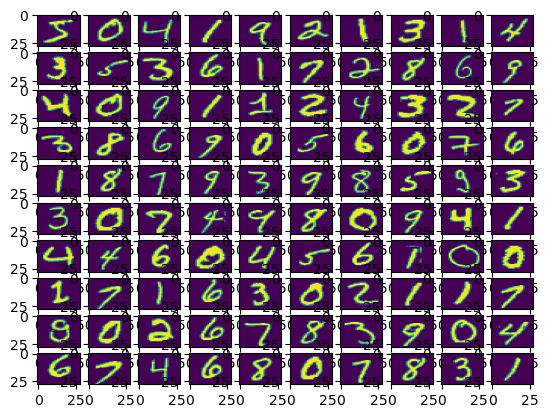

In [18]:
fig, ax = plt.subplots(10, 10) 
k = 0
for i in range(10): 
    for j in range(10): 
        ax[i][j].imshow(x_train[k].reshape(28, 28),  
                        aspect='auto') 
        k += 1
plt.show() 

In [20]:
model = Sequential([ 
    
    # reshape 28 row * 28 column data to 28*28 rows 
    Flatten(input_shape=(28, 28)), 
    
      # dense layer 1 
    Dense(256, activation='sigmoid'),   
    
    # dense layer 2 
    Dense(128, activation='sigmoid'),  
    
      # output layer 
    Dense(10, activation='sigmoid'),   
])

In [21]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

In [22]:
model.fit(x_train, y_train, epochs=10,  
          batch_size=2000,  
          validation_split=0.2) 

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.2253 - loss: 2.2394 - val_accuracy: 0.6863 - val_loss: 1.7388
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6896 - loss: 1.5637 - val_accuracy: 0.7883 - val_loss: 1.0540
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7902 - loss: 0.9708 - val_accuracy: 0.8525 - val_loss: 0.6947
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8507 - loss: 0.6652 - val_accuracy: 0.8842 - val_loss: 0.5134
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8788 - loss: 0.5121 - val_accuracy: 0.8988 - val_loss: 0.4157
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8934 - loss: 0.4210 - val_accuracy: 0.9084 - val_loss: 0.3584
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9028 - loss: 0.3717 - val_accuracy: 0.9146 - val_loss: 0.3225
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9093 - loss: 0.3362 - val_accuracy: 0.9193 - v

In [24]:
results = model.evaluate(x_test,  y_test, verbose = 0) 
print('test loss:', results)

test loss: [0.2701994478702545, 0.9248999953269958]


In [25]:
print( 'test acc:', results)

test acc: [0.2701994478702545, 0.9248999953269958]


# ex.4 convolution neural network on binary classification task:CAT & DOG dataset

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,MaxPooling2D,Dense,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [3]:
cat_dir = r"C:\Users\daiku\Downloads\cat and dog datasets\kagglecatsanddogs_3367a\PetImages\Cat"
dog_dir = r"C:\Users\daiku\Downloads\cat and dog datasets\kagglecatsanddogs_3367a\PetImages\Dog"


cat_images = [os.path.join(cat_dir, img) for img in os.listdir(cat_dir)]
dog_images = [os.path.join(dog_dir, img) for img in os.listdir(dog_dir)]

all_images = cat_images + dog_images
labels = [0] * len(cat_images) + [1] * len(dog_images)

train_img,test_img,train_label,test_label = train_test_split(all_images,labels,test_size=0.2,random_state=232)

In [4]:
img_size = 128
batch_size = 64
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=r"C:\Users\daiku\Downloads\cat and dog datasets\kagglecatsanddogs_3367a\PetImages",
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    directory=r"C:\Users\daiku\Downloads\cat and dog datasets\kagglecatsanddogs_3367a\PetImages",
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode='binary'
)

Found 24959 images belonging to 2 classes.
Found 24959 images belonging to 2 classes.


In [5]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',
             metrics=['accuracy'])
histroy = model.fit(train_generator,epochs=5,validation_data=test_generator)

C:\Users\daiku\OneDrive\Documents\Python Scripts\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\daiku\OneDrive\Documents\Python Scripts\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
236/390 ━━━━━━━━━━━━━━━━━━━━ 1:51 725ms/step - accuracy: 0.5395 - loss: 0.6991

C:\Users\daiku\OneDrive\Documents\Python Scripts\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


390/390 ━━━━━━━━━━━━━━━━━━━━ 348s 883ms/step - accuracy: 0.5679 - loss: 0.6790 - val_accuracy: 0.7186 - val_loss: 0.5515
Epoch 2/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 311s 799ms/step - accuracy: 0.7315 - loss: 0.5393 - val_accuracy: 0.8020 - val_loss: 0.4290
Epoch 3/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 328s 842ms/step - accuracy: 0.7882 - loss: 0.4575 - val_accuracy: 0.8292 - val_loss: 0.3814
Epoch 4/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 336s 861ms/step - accuracy: 0.8186 - loss: 0.4084 - val_accuracy: 0.8458 - val_loss: 0.3491
Epoch 5/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 368s 944ms/step - accuracy: 0.8311 - loss: 0.3777 - val_accuracy: 0.8338 - val_loss: 0.3666


In [6]:
model.save('cnn_binary.keras')

In [7]:
import tensorflow as tf
model=tf.keras.models.load_model('cnn_binary.keras')

In [8]:
loss,accuracy = model.evaluate(test_generator)
print(f"Test Accuracy : {accuracy*100:2f}%")

390/390 ━━━━━━━━━━━━━━━━━━━━ 92s 234ms/step - accuracy: 0.8370 - loss: 0.3603
Test Accuracy : 83.384752%


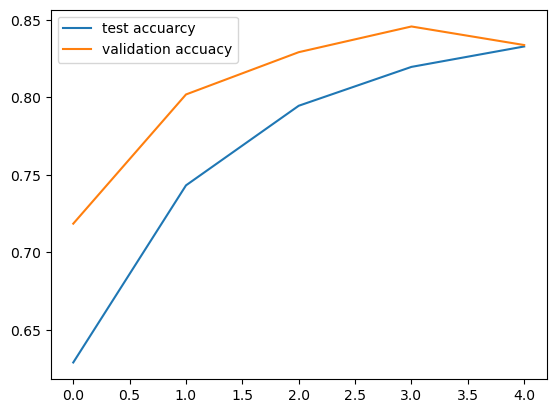

In [9]:
plt.plot(histroy.history['accuracy'], label = 'test accuarcy')
plt.plot(histroy.history['val_accuracy'],label = 'validation accuacy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
the predicted image is :Dog


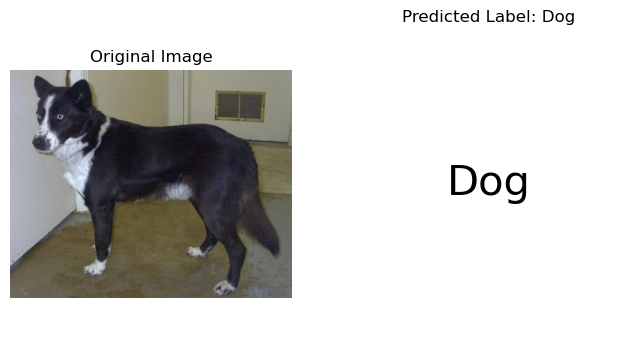

In [10]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
def predict_img(model, img_path, img_size):
    img = image.load_img(img_path,target_size=(img_size,img_size))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array,axis=0)
    prediction = model.predict(img_array)
    return "Dog" if prediction[0][0]>0.5 else 'Cat'

img_path =r"C:\Users\daiku\Downloads\cat and dog datasets\kagglecatsanddogs_3367a\PetImages\Dog\9979.jpg"
img_path1 =r"C:\Users\daiku\Downloads\cat and dog datasets\kagglecatsanddogs_3367a\PetImages\Cat\9996.jpg"

predited_label = predict_img(model,img_path,img_size)
print(f"the predicted image is :{predited_label}")


# Load the original image for display
original_image = image.load_img(img_path)

# Set up the plot
plt.figure(figsize=(8, 4))

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.axis('off')  # Hide axis
plt.title('Original Image')

# Show the predicted label
plt.subplot(1, 2, 2)
plt.axis('off')  # Hide axis
plt.title(f'Predicted Label: {predited_label}')
plt.text(0.5, 0.5, f'{predited_label}', fontsize=30, ha='center', va='center')

# Display the plot
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


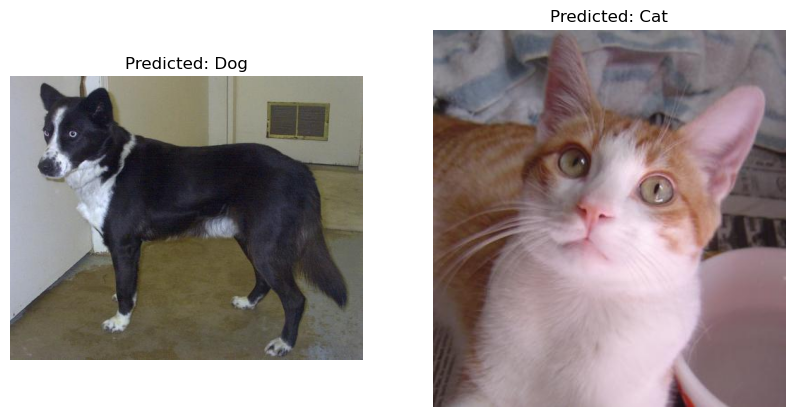

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import cv2

# Function to process the image for prediction
def process_image(img_path, img_size=128):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Function to predict and display image with label
def predict_and_display(model, img_path):
    img_array = process_image(img_path)
    prediction = model.predict(img_array)
    label = 'Dog' if prediction > 0.5 else 'Cat'
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    plt.imshow(img)
    plt.title(f"Predicted: {label}")
    plt.axis('off')

# Path to sample images (replace these paths with actual image paths)
cat_image_path = r"C:\Users\daiku\Downloads\cat and dog datasets\kagglecatsanddogs_3367a\PetImages\Dog\9979.jpg"
dog_image_path = r"C:\Users\daiku\Downloads\cat and dog datasets\kagglecatsanddogs_3367a\PetImages\Cat\9996.jpg"

# Display both images with predicted labels side by side
def display_side_by_side(cat_img_path, dog_img_path):
    plt.figure(figsize=(10, 5))

    # Display cat image
    plt.subplot(1, 2, 1)
    predict_and_display(model, cat_img_path)

    # Display dog image
    plt.subplot(1, 2, 2)
    predict_and_display(model, dog_img_path)

    plt.show()

# Build and train your model (CNN architecture)
# This part is the same as before, with the model built and trained

# Once the model is trained, you can display the images side by side
display_side_by_side(cat_image_path, dog_image_path)


# 5  Convolution neural network on multi-classification task: Dog breed classifications

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import cv2
import tensorflow as tf
from tensorflow import keras
from keras import layers
from functools import partial

import warnings
warnings.filterwarnings('ignore')
AUTO = tf.data.experimental.AUTOTUNE


In [37]:
from zipfile import ZipFile
data_path = r"C:\Users\daiku\Downloads\dog-breed-identification.zip"

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')

The data set has been extracted.


In [26]:
df = pd.read_csv(r"C:\Users\daiku\Downloads\labels.csv")
df.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [27]:
df.shape

(10222, 2)

In [29]:
df['breed'].nunique()

120

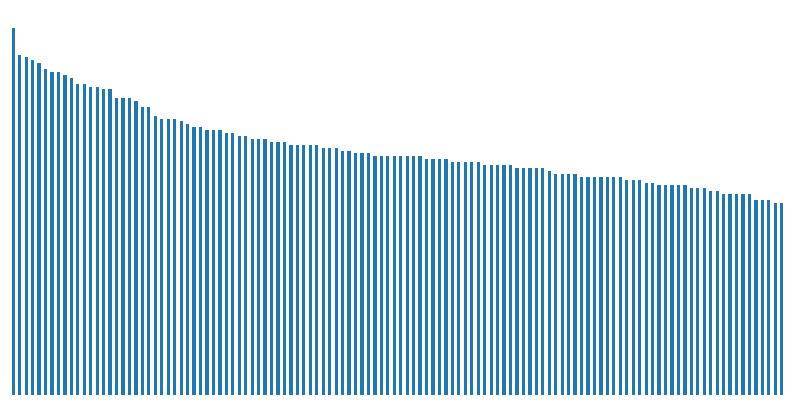

In [30]:
plt.figure(figsize=(10, 5))
df['breed'].value_counts().plot.bar()
plt.axis('off')
plt.show()

In [31]:
df['filepath'] = 'train/' + df['id'] + '.jpg'
df.head()

id             breed  \
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull   
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo   
2  001cdf01b096e06d78e9e5112d419397          pekinese   
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick   
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever   

                                     filepath  
0  train/000bec180eb18c7604dcecc8fe0dba07.jpg  
1  train/001513dfcb2ffafc82cccf4d8bbaba97.jpg  
2  train/001cdf01b096e06d78e9e5112d419397.jpg  
3  train/00214f311d5d2247d5dfe4fe24b2303d.jpg  
4  train/0021f9ceb3235effd7fcde7f7538ed62.jpg

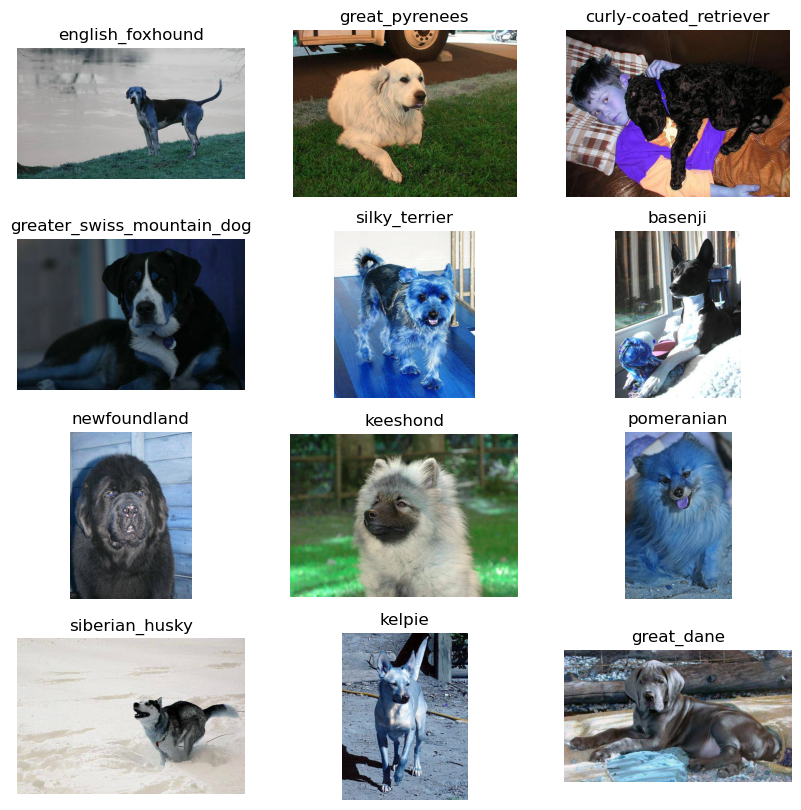

In [38]:
plt.subplots(figsize=(10, 10))
for i in range(12):
    plt.subplot(4, 3, i+1)

    # Selecting a random image
    # index from the dataframe.
    k = np.random.randint(0, len(df))
    img = cv2.imread(df.loc[k, 'filepath'])
    plt.imshow(img)
    plt.title(df.loc[k, 'breed'])
    plt.axis('off')
plt.show()


In [39]:
le = LabelEncoder()
df['breed'] = le.fit_transform(df['breed'])
df.head()

id  breed  \
0  000bec180eb18c7604dcecc8fe0dba07     19   
1  001513dfcb2ffafc82cccf4d8bbaba97     37   
2  001cdf01b096e06d78e9e5112d419397     85   
3  00214f311d5d2247d5dfe4fe24b2303d     15   
4  0021f9ceb3235effd7fcde7f7538ed62     49   

                                     filepath  
0  train/000bec180eb18c7604dcecc8fe0dba07.jpg  
1  train/001513dfcb2ffafc82cccf4d8bbaba97.jpg  
2  train/001cdf01b096e06d78e9e5112d419397.jpg  
3  train/00214f311d5d2247d5dfe4fe24b2303d.jpg  
4  train/0021f9ceb3235effd7fcde7f7538ed62.jpg

In [40]:
features = df['filepath']
target = df['breed']

X_train, X_val, Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.15,
                                      random_state=10)

X_train.shape, X_val.shape


((8688,), (1534,))

In [43]:
# pip install albumentations
import albumentations as A
transforms_train = A.Compose([
    A.VerticalFlip(p=0.2),
    A.HorizontalFlip(p=0.7),
    A.CoarseDropout(p=0.5),
    A.RandomGamma(p=0.5),
    A.RandomBrightnessContrast(p=1)
])


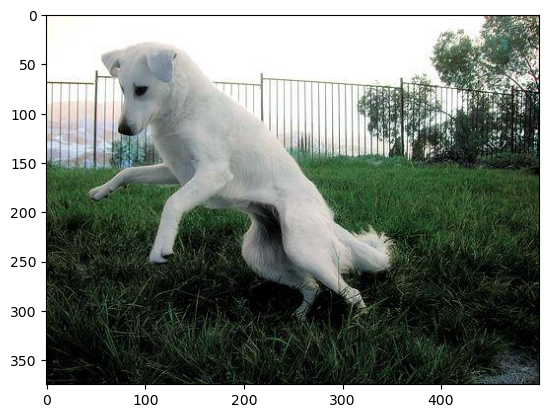

In [44]:
img = cv2.imread(r"C:\Users\daiku\Downloads\dog-breed-identification\train\fb6bca9a75ead518333fd3c98aa4dc40.jpg")
plt.imshow(img)
plt.show()

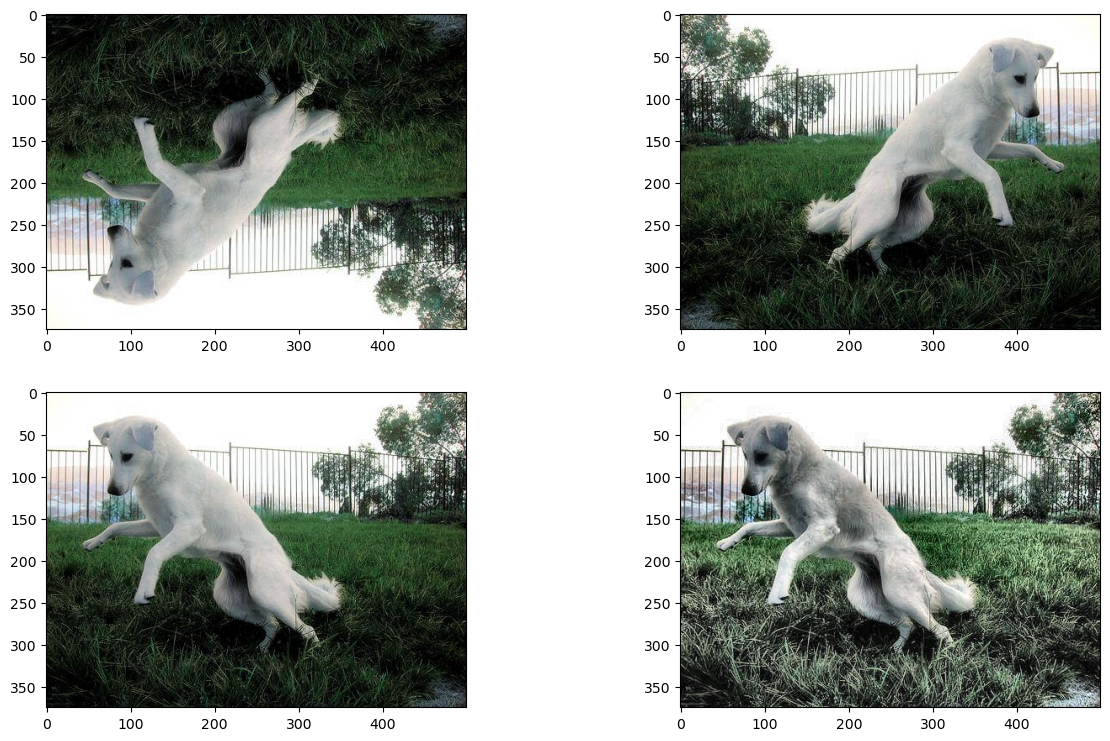

In [61]:
augments = [A.VerticalFlip(p=1), A.HorizontalFlip(p=1),
            A.CoarseDropout(p=1), A.CLAHE(p=1)]

plt.subplots(figsize=(15,9 ))
for i, aug in enumerate(augments):
    plt.subplot(2, 2, i+1)
    aug_img = aug(image=img)['image']
    plt.imshow(aug_img)
plt.show()


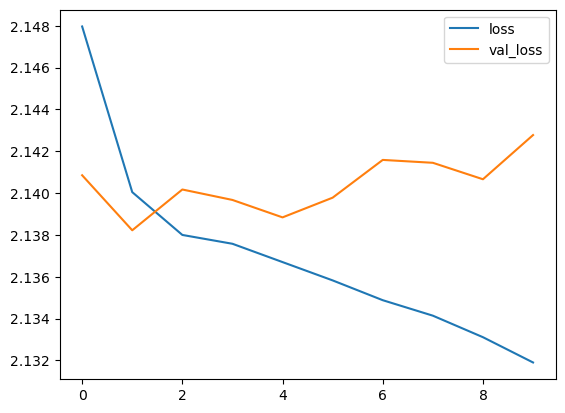

In [47]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.show()


# ex:6 transfer learning using trained architecation

# ex.7 Hyper parameter optimization on cnn

# ex :8 Recurrent neural network on stock price prediction

# ex.no: 9 Gated Recurrent neural network on image segmentation task (CRNN)

In [38]:
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input, GRU, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [39]:
img_height, img_width= 128, 128
batch_size = 16

In [40]:
def load_image_and_mask(image_path, mask_path, img_height, img_width):
    # Load the image and mask
    image = load_img(image_path, target_size=(img_height, img_width))
    mask = load_img(mask_path, target_size=(img_height, img_width), color_mode="grayscale")
    
    # Convert to array and normalize
    image = img_to_array(image) / 255.0  # Normalize image
    mask = img_to_array(mask) / 255.0    # Normalize mask

    return image, mask

In [41]:
def custom_data_generator(image_folder, mask_folder, batch_size, img_height, img_width):
    image_files = os.listdir(image_folder)
    mask_files = os.listdir(mask_folder)

    while True:
        for i in range(0, len(image_files), batch_size):
            batch_images = []
            batch_masks = []

            for j in range(i, min(i + batch_size, len(image_files))):
                image_path = os.path.join(image_folder, image_files[j])
                mask_path = os.path.join(mask_folder, mask_files[j])

                image, mask = load_image_and_mask(image_path, mask_path, img_height, img_width)
                batch_images.append(image)
                batch_masks.append(mask)

            yield np.array(batch_images), np.array(batch_masks)


In [45]:
image_folder = r"C:\Users\daiku\Downloads\lstm image dataset\Image"
mask_folder = r"C:\Users\daiku\Downloads\lstm image dataset\Mask"

# Define your parameters
img_height, img_width = 128, 128  # Adjust to your target size
batch_size = 32  # Set your batch size

# Create the custom generator
train_generator = custom_data_generator(image_folder, mask_folder, batch_size, img_height, img_width)

# Example of getting a batch
images, masks = next(train_generator)
print(f"Batch of images shape: {images.shape}, Batch of masks shape: {masks.shape}")

Batch of images shape: (32, 128, 128, 3), Batch of masks shape: (32, 128, 128, 1)


In [46]:
input_img = Input(shape=(img_height, img_width, 3))

x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2))(x)
x = Reshape((img_height // 2 * img_width // 2, 128))(x)  # Flatten to a sequence
x = GRU(64, return_sequences=True)(x)  # GRU layer
x = Reshape((img_height // 2, img_width // 2, 64))(x)  # Reshape back
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
output = Conv2D(1, (1, 1), activation='sigmoid')(x)

model = Model(inputs=input_img, outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
model.fit(train_generator, steps_per_epoch=len(os.listdir(image_folder)) // batch_size, epochs=10)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.6023 - loss: 0.6891
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 0.6402 - loss: 0.6582
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.7109 - loss: 0.5929
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step - accuracy: 0.7557 - loss: 0.5318
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step - accuracy: 0.7322 - loss: 0.5418
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 0.7502 - loss: 0.5160
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.7648 - loss: 0.4974
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.7355 - loss: 0.5278
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.7710 - loss: 0.4820
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step - accuracy: 0.7666 - loss: 0.4836


In [48]:
model.save("GRU_segmentation_model.keras")

In [53]:
# image for prediction

from sklearn.metrics import accuracy_score

def load_and_preprocess_image(image_path, img_height, img_width):
    image = load_img(image_path, target_size=(img_height, img_width))
    image = img_to_array(image) / 255.0  # Normalize
    return np.expand_dims(image, axis=0)  # Add batch dimension

new_image_path = r"C:\Users\daiku\Downloads\lstm image dataset\Image\13.jpg"
new_image = load_and_preprocess_image(new_image_path, img_height, img_width)

predicted_mask = model.predict(new_image)
predicted_mask = (predicted_mask.squeeze() > 0.5).astype(np.uint8)  
accuracy = accuracy_score(true_mask_binary.flatten(), predicted_mask_binary.flatten())
print(f"Model Accuracy: {accuracy:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


NameError: name 'true_mask_binary' is not defined

In [54]:
accuracy = accuracy_score(true_mask_binary.flatten(), predicted_mask_binary.flatten())
print(f"Model Accuracy: {accuracy:.4f}")

NameError: name 'true_mask_binary' is not defined

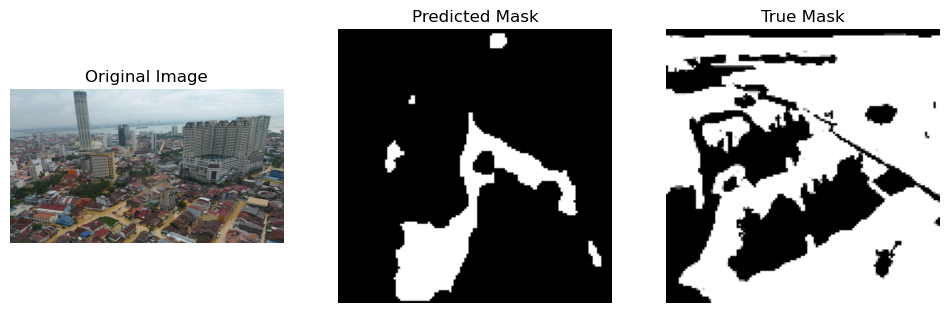

In [56]:
import matplotlib.pyplot as plt

original_image = load_img(r"C:\Users\daiku\Downloads\lstm image dataset\Image\3088.jpg")
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis("off")
plt.subplot(1, 3, 2)
plt.title("Predicted Mask")
plt.imshow(predicted_mask, cmap='gray')
plt.axis("off")

true_mask_path = r"C:\Users\daiku\Downloads\lstm image dataset\Mask\3013.png"
true_mask = load_img(true_mask_path, target_size=(img_height, img_width), color_mode="grayscale")

plt.subplot(1, 3, 3)
plt.title("True Mask")
plt.imshow(true_mask, cmap='gray')
plt.axis("off")

plt.show()


Resizing true mask to match predicted mask dimensions.


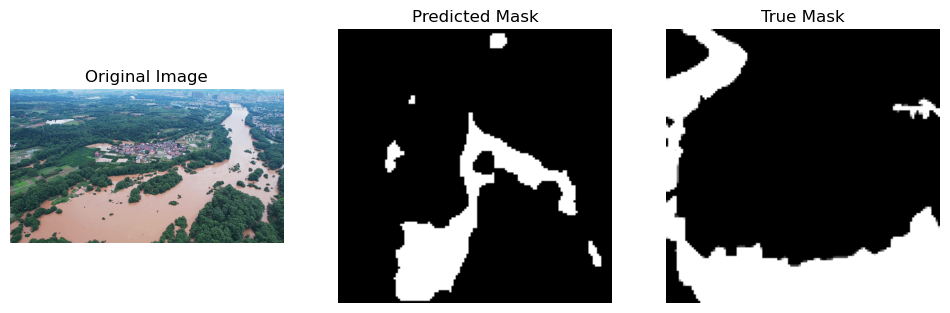

Accuracy: 0.6432


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import accuracy_score
from keras.preprocessing.image import img_to_array

# Load original image for comparison
original_image = load_img(r"C:\Users\daiku\Downloads\lstm image dataset\Image\3006.jpg")

# Convert the predicted mask and true mask to binary
predicted_mask_binary = (predicted_mask > 0.5).astype(np.uint8)  # Assuming predicted_mask is a 2D array

# Load and resize the true mask to match predicted mask dimensions
true_mask_path = r"C:\Users\daiku\Downloads\lstm image dataset\Mask\3020.png"
true_mask = load_img(true_mask_path, target_size=(img_height, img_width), color_mode="grayscale")
true_mask_binary = img_to_array(true_mask)  # Convert to numpy array for accuracy calculation

# Ensure the shapes are consistent
if predicted_mask_binary.shape != true_mask_binary.shape:
    print("Resizing true mask to match predicted mask dimensions.")
    true_mask_binary = np.resize(true_mask_binary, predicted_mask_binary.shape)

# Calculate accuracy
accuracy = accuracy_score(true_mask_binary.flatten(), predicted_mask_binary.flatten())

# Plot the images
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Predicted Mask")
plt.imshow(predicted_mask, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("True Mask")
plt.imshow(true_mask, cmap='gray')
plt.axis("off")

plt.show()

# Print accuracy
print(f"Accuracy: {accuracy:.4f}")


# ex.10 LSTM on price prediction

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [23]:
# Load the custom dataset
data = pd.read_csv(r"C:\Users\daiku\Downloads\archive\AAPL.csv")
data.head()

Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100323  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.095089  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.088110  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090291   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092908   73449600

In [24]:
prices = data['Close'].values.reshape(-1, 1)

In [25]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60  # Look back 60 days
X, y = create_dataset(scaled_prices, time_step)

train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)



In [27]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))  # Output layer

In [28]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 1.4233e-05 - val_loss: 2.1805e-05
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 1.9183e-07 - val_loss: 1.0981e-05
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 2.0551e-07 - val_loss: 1.0636e-05
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 1.3259e-07 - val_loss: 9.1165e-06
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 1.5908e-07 - val_loss: 1.0711e-05
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 1.1752e-07 - val_loss: 8.2983e-06
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 1.2036e-07 - val_loss: 8.5394e-06
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 1.5945e-07 - val_loss: 7.7047e-06
Epoch 9/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 1.3539e-07 - val_loss: 6.5417e-06
Epoch 10/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 9.3862e-08 - val_loss: 1.0631e-05
Epoch 11/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/

In [29]:
model.save('LSTM_PRICE_with_accuracy.keras')

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
RMSE: 7.23398052224141
MAE: 3.646170157400292


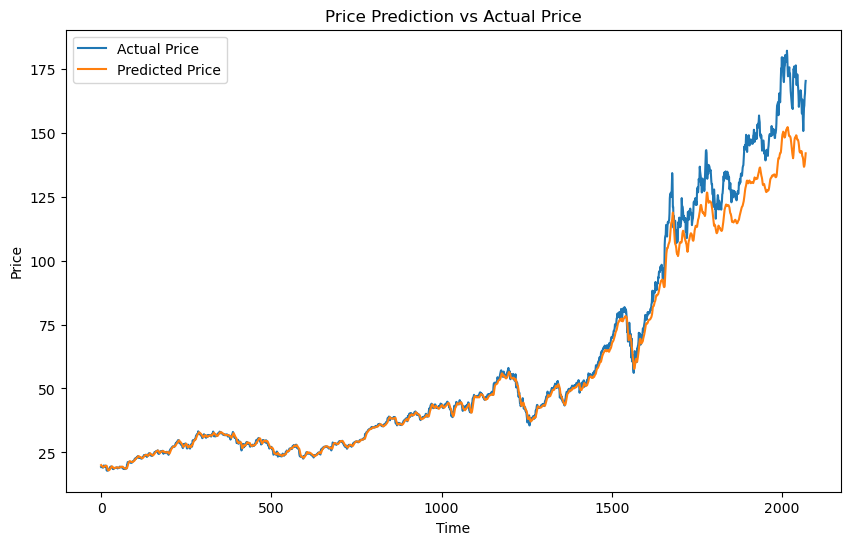

In [30]:
#  Make Predictions
y_predicted = model.predict(X_test)

# Inverse transform to get the actual values
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate accuracy metrics
mse = mean_squared_error(y_test_actual, y_predicted)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_predicted)

# Display results
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Optionally, plot the results
plt.figure(figsize=(10,6))
plt.plot(y_test_actual, label="Actual Price")
plt.plot(y_predicted, label="Predicted Price")
plt.title("Price Prediction vs Actual Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


# ex.11 LSTM ON IMAGE SEGMENTATION

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [5]:
def load_data(image_dir, mask_dir, img_size=(128, 128)):
    images = []
    masks = []
    
    # List all image and mask files
    image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
    mask_paths = [os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

    for img_path, mask_path in zip(image_paths, mask_paths):
        img = keras.preprocessing.image.load_img(img_path, target_size=img_size)
        img = keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize
        images.append(img)

        mask = keras.preprocessing.image.load_img(mask_path, target_size=img_size, color_mode="grayscale")
        mask = keras.preprocessing.image.img_to_array(mask) / 255.0  # Normalize
        masks.append(mask)

    return np.array(images), np.array(masks)

# Example usage
train_images, train_masks = load_data(
    r"C:\Users\daiku\Downloads\archive (1)\Image", 
    r"C:\Users\daiku\Downloads\archive (1)\Mask"
)


In [6]:
def create_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder (Downsampling)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    # Add more layers here as needed...
    
    # Flatten to create a sequence for LSTM
    c_lstm = layers.Reshape((-1, 64))(p1)  # Reshape for LSTM input
    lstm_out = layers.LSTM(64, return_sequences=True)(c_lstm)

    # Reshape back to 4D for Conv2D layer
    lstm_out_reshaped = layers.Reshape((input_shape[0] // 2, input_shape[1] // 2, 64))(lstm_out)

    # Decoder (Upsampling)
    u1 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(lstm_out_reshaped)
    u1 = layers.concatenate([u1, c1])  # Skip connection
    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u1)
    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)

    # Output layer
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c2)

    model = keras.Model(inputs, outputs)
    return model

# Create the model
model = create_model((128, 128, 3))


In [7]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 128, 128, 64)      │           1,792 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 128, 128, 64)      │          36,928 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 64, 64, 64)        │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape (Reshape)             │ (None, 4096, 64)          │               0 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm (LSTM)                   │ (None, 4096, 64)          │          33,024 │ reshape[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_1 (Reshape)           │ (None, 64, 64, 64)        │               0 │ lstm[0][0]                 │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_transpose              │ (None, 128, 128, 64)      │          16,448 │ reshape_1[0][0]            │
│ (Conv2DTranspose)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 128, 128, 128)     │               0 │ conv2d_transpose[0][0],    │
│                               │                           │                 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 128, 128, 64)      │          73,792 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 128, 128, 64)      │          36,928 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 128, 128, 1)       │              65 │ conv2d_3[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 198,977 (777.25 KB)

 Trainable params: 198,977 (777.25 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [9]:
history = model.fit(train_images, train_masks, batch_size=32, epochs=20, validation_split=0.1)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 85s 8s/step - accuracy: 0.5922 - loss: 0.6762 - val_accuracy: 0.8118 - val_loss: 0.5279
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 79s 8s/step - accuracy: 0.7529 - loss: 0.5321 - val_accuracy: 0.6517 - val_loss: 0.8552
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 82s 8s/step - accuracy: 0.6587 - loss: 0.7733 - val_accuracy: 0.8267 - val_loss: 0.4160
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 75s 8s/step - accuracy: 0.7343 - loss: 0.5541 - val_accuracy: 0.7806 - val_loss: 0.5190
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 84s 9s/step - accuracy: 0.7532 - loss: 0.5389 - val_accuracy: 0.8270 - val_loss: 0.4312
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 77s 8s/step - accuracy: 0.7712 - loss: 0.4937 - val_accuracy: 0.8390 - val_loss: 0.4149
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 74s 8s/step - accuracy: 0.7919 - loss: 0.4695 - val_accuracy: 0.8435 - val_loss: 0.3857
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 76s 8s/step - accuracy: 0.7715 - loss: 0.4838 - val_accuracy: 0.8514 - val_loss: 0.3595
Epoch 9/

In [10]:
model.save('lstm_image.keras')

In [11]:
def load_data(image_path, mask_path, img_size=(128, 128)):
    img = keras.preprocessing.image.load_img(image_path, target_size=img_size)
    img = keras.preprocessing.image.img_to_array(img) / 255.0 
    mask = keras.preprocessing.image.load_img(mask_path, target_size=img_size, color_mode="grayscale")
    mask = keras.preprocessing.image.img_to_array(mask) / 255.0  
    
    return np.expand_dims(img, axis=0), np.expand_dims(mask, axis=0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


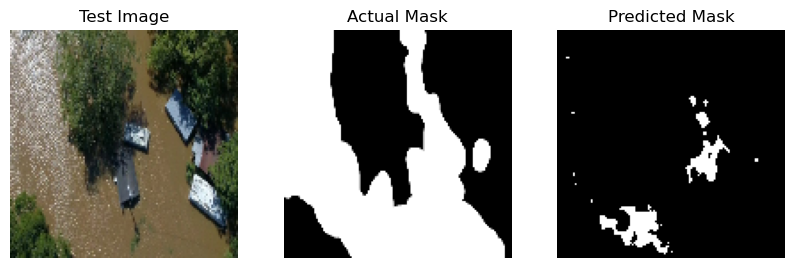

In [12]:
image_path = r"C:\Users\daiku\Downloads\archive (1)\Image\2024.jpg"
mask_path = r"C:\Users\daiku\Downloads\archive (1)\Mask\2024.png"

test_images, test_masks = load_data(image_path, mask_path)
predictions = model.predict(test_images)
predictions = (predictions > 0.5).astype(np.uint8)

plt.figure(figsize=(10, 10))
# Show test image
plt.subplot(1, 3, 1)
plt.imshow(test_images[0])
plt.axis('off')
plt.title("Test Image")

plt.subplot(1, 3, 2)
plt.imshow(test_masks[0].squeeze(), cmap='gray')
plt.axis('off')
plt.title("Actual Mask")

plt.subplot(1, 3, 3)
plt.imshow(predictions[0].squeeze(), cmap='gray')
plt.axis('off')
plt.title("Predicted Mask")

plt.show()


In [13]:
#pixel Accuracy score
def pixel_accuracy(true_masks, predicted_masks):
    # Flatten the arrays to compare pixel-wise
    true_masks_flat = true_masks.flatten()
    predicted_masks_flat = predicted_masks.flatten()
    accuracy = np.mean(true_masks_flat == predicted_masks_flat)
    return accuracy

accuracy = pixel_accuracy(test_masks, predictions)
print(f"Pixel-wise Accuracy: {accuracy * 100:.2f}%")

#IOU scroe
def iou_score(true_masks, predicted_masks):
    intersection = np.logical_and(true_masks, predicted_masks)
    union = np.logical_or(true_masks, predicted_masks)
    iou = np.sum(intersection) / np.sum(union)
    return iou

# Example usage:
iou = iou_score(test_masks, predictions)
print(f"IoU: {iou:.4f}")

#Dice coefficient score
def dice_coefficient(true_masks, predicted_masks):
    intersection = np.sum(true_masks * predicted_masks)
    dice = (2. * intersection) / (np.sum(true_masks) + np.sum(predicted_masks))
    return dice

# Example usage:
dice = dice_coefficient(test_masks, predictions)
print(f"Dice Coefficient: {dice:.4f}")


Pixel-wise Accuracy: 54.13%
IoU: 0.0923
Dice Coefficient: 0.1704


# ex.12 Anomaly detection using autoencoders

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0837 - val_loss: 0.0833
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0830 - val_loss: 0.0833
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0829 - val_loss: 0.0831
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0825 - val_loss: 0.0828
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0820 - val_loss: 0.0820
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0805 - val_loss: 0.0811
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0799 - val_loss: 0.0805
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0792 - val_loss: 0.0802
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0784 - val_loss: 0.0798
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0781 - val_loss: 0.0795
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0774 - val_loss: 0.0794
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0771 - val_lo

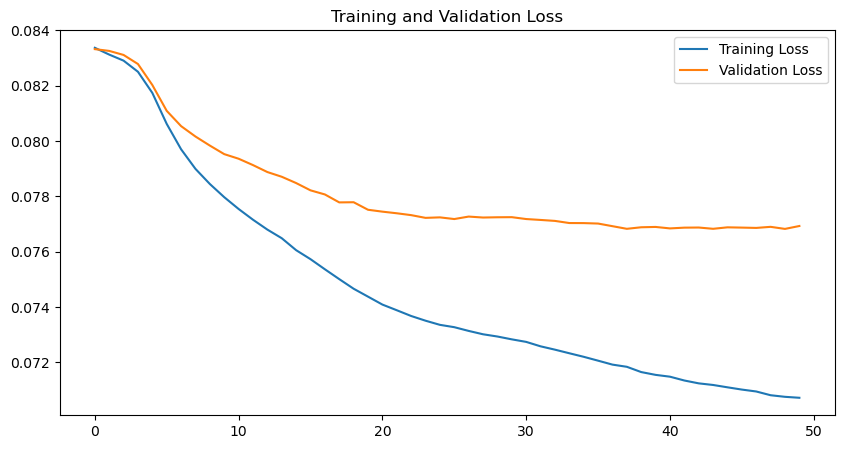

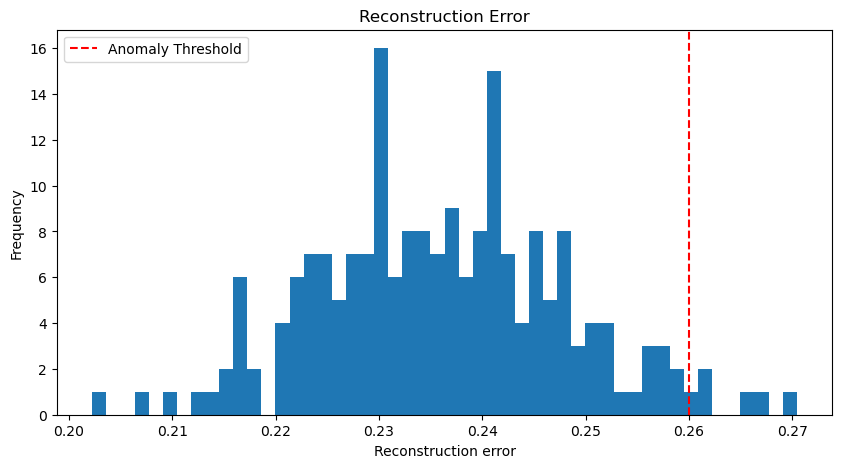

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate sample data
data = np.random.rand(1000, 141)  # 1000 samples, 141 columns (last column is the target)
data[:, -1] = np.random.choice([0, 1], size=(1000,))  # target: 0 for anomaly, 1 for normal

# Prepare features and target
TARGET = data.shape[1] - 1
features = data[:, :TARGET]
target = data[:, TARGET]

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target)

# Build the Autoencoder model
def build_autoencoder(input_dim):
    # Encoder
    encoder_input = layers.Input(shape=(input_dim,))
    encoded = layers.Dense(64, activation='relu')(encoder_input)
    encoded = layers.Dense(32, activation='relu')(encoded)
    encoded = layers.Dense(16, activation='relu')(encoded)

    # Decoder
    decoded = layers.Dense(32, activation='relu')(encoded)
    decoded = layers.Dense(64, activation='relu')(decoded)
    decoder_output = layers.Dense(input_dim, activation='sigmoid')(decoded)

    autoencoder = models.Model(encoder_input, decoder_output)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

input_dim = x_train.shape[1]
autoencoder = build_autoencoder(input_dim)

# Train the autoencoder
history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=32, validation_data=(x_test, x_test))

# Compute reconstruction error on test set
reconstructed = autoencoder.predict(x_test)
reconstruction_error = np.mean(np.abs(reconstructed - x_test), axis=1)

# Threshold for anomaly detection
threshold = np.mean(reconstruction_error) + 2 * np.std(reconstruction_error)
anomalies = reconstruction_error > threshold

# Output the number of detected anomalies
print("Number of anomalies detected:", np.sum(anomalies))

# Plot training and validation loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot histogram of reconstruction error
plt.figure(figsize=(10,5))
plt.hist(reconstruction_error, bins=50)
plt.axvline(x=threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.title('Reconstruction Error')
plt.xlabel('Reconstruction error')
plt.ylabel('Frequency')
plt.legend()
plt.show()
